## Image Classification with CIFAR-10

### Information on CIFAR-10 Dataset
CIFAR-10: https://www.cs.toronto.edu/~kriz/cifar.html
- CIFAR-10 contains 60000 images of 32x32 pixels in 3 channels divided by 10 classes.
- Each class contains 6000 images

### Import the libraries we'll use

In [3]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#plots
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

#tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from tensorflow.keras.layers import BatchNormalization
from keras import metrics
from keras import utils

!pip install visualkeras
import visualkeras
from tensorflow.keras.utils import plot_model

%matplotlib inline

#Import CIFAR-10, CIFAR-100 Classification
from keras.datasets import cifar10, cifar100

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 kB 53.9 MB/s eta 0:00:00


### Check Runtime Resources





In [13]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Apr 12 22:34:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    55W / 400W |  10931MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [14]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


## CIFAR-10: Import & Exploratory Data Analysis

In [49]:
# load training and testing datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # or cifar100.load_data()

In [50]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [14]:
# Pixel values range from 0 to 255. To normalize the data, just divide all values by 255.
x_train = x_train / 255
x_test = x_test / 255

# Flatten Y_train and Y_test, so they become vectors of label values.
# The label for X_train[0] is in Y_train[0].
y_train = y_train.flatten()
y_test = y_test.flatten()

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(x_train.shape[0])
shuffled_indices = np.random.permutation(indices)
x_train = x_train[shuffled_indices]
y_train = y_train[shuffled_indices]

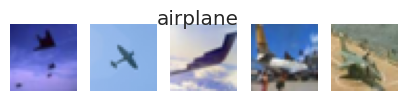

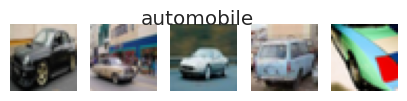

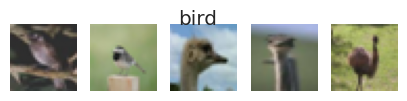

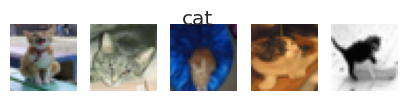

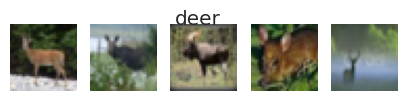

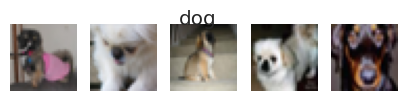

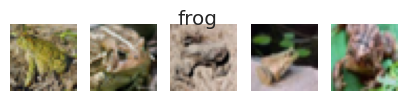

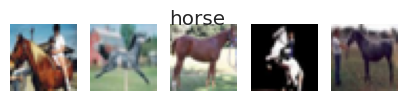

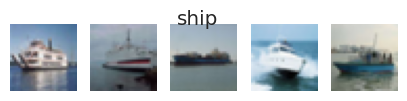

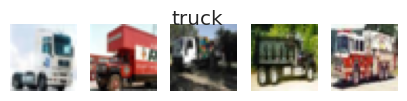

In [18]:
for i in range(len(label_names)):
    # Get the first 5 images of the class
    images = x_train[y_train == i][:5]
    # Plot the images
    fig, axs = plt.subplots(1, 5, figsize=(5,1))
    fig.suptitle(label_names[i])
    for j in range(5):
        axs[j].imshow(images[j])
        axs[j].axis('off')
    # Loop thru printing out plots
    plt.show()

## Train and Test Neural Network Architectures

## Build Feedforward Neural Network Model
Create a placeholder function for building a neural net

In [8]:
def build_model(n_classes,
                hidden_layer_sizes=[256, 128, 64],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  # YOUR CODE HERE
  model = keras.Sequential()
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [9]:
model = build_model(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=15,
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/15
704/704 [==============================] - 10s 5ms/step - loss: 1.9499 - accuracy: 0.3206 - val_loss: 1.7986 - val_accuracy: 0.3682
Epoch 2/15
704/704 [==============================] - 3s 4ms/step - loss: 1.7067 - accuracy: 0.3928 - val_loss: 1.7275 - val_accuracy: 0.3796
Epoch 3/15
704/704 [==============================] - 3s 4ms/step - loss: 1.6292 - accuracy: 0.4200 - val_loss: 1.6569 - val_accuracy: 0.4082
Epoch 4/15
704/704 [==============================] - 3s 4ms/step - loss: 1.5836 - accuracy: 0.4396 - val_loss: 1.6040 - val_accuracy: 0.4276
Epoch 5/15
704/704 [==============================] - 2s 3ms/step - loss: 1.5456 - accuracy: 0.4534 - val_loss: 1.5733 - val_accuracy: 0.4482
Epoch 6/15
704/704 [==============================] - 3s 4ms/step - loss: 1.5130 - accuracy: 0.4618 - val_loss: 1.5821 - val_accuracy: 0.4470
Epoch 7/15
704/704 [==============================] - 2s 3ms/step - loss: 1.4908 - accuracy: 0.4715 - val_loss: 1.5709 - val_accuracy: 0.4506
Epoch

,loss,accuracy,val_loss,val_accuracy
0,1.949905,0.320600,1.798554,0.3682
1,1.706671,0.392844,1.727496,0.3796
2,1.629190,0.419978,1.656888,0.4082
3,1.583650,0.439556,1.603996,0.4276
4,1.545604,0.453444,1.573292,0.4482
5,1.512979,0.461800,1.582135,0.4470
6,1.490789,0.471511,1.570885,0.4506
7,1.464982,0.479978,1.527920,0.4774
8,1.448790,0.488000,1.558798,0.4622
9,1.430632,0.491733,1.507208,0.4760


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 3,157,002
Trainable params: 3,157,002
Non-trainable params: 0
_________________________________________________________________
None


### Plot FNN Model Training & Validation Accuracy, Evaluate Model Against Test Data

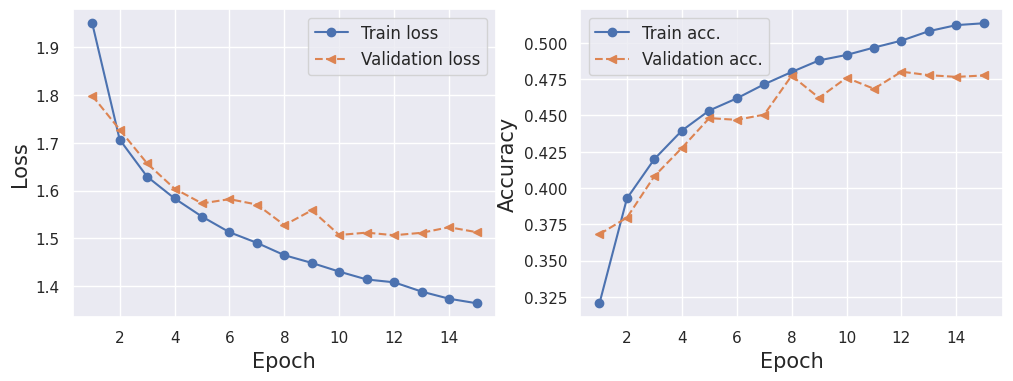

In [10]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [11]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 1.4926 - accuracy: 0.4727

Test Acc. 47.27%


In [12]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(x_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 1s 3ms/step
[2 8 8 ... 3 2 7]


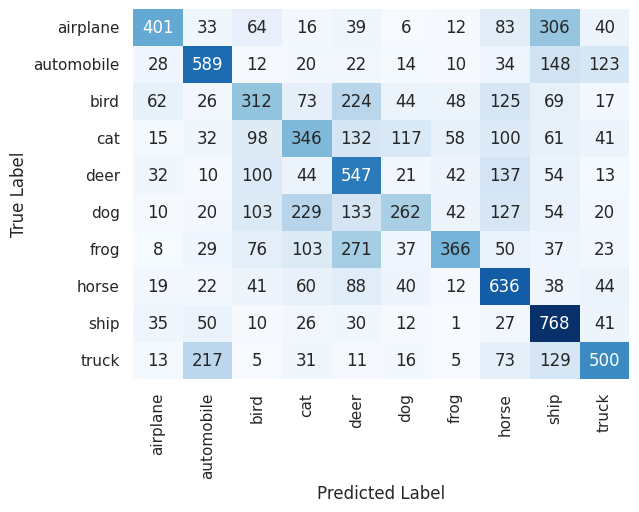

In [13]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

## Build CNN Model 1

Differences from FFNN to CNN Model 1
1.   Add two distinct Conv2D and MaxPool2D Layers
2.   Add dropout layer after fully connected dense layer



In [14]:
def build_cnn_model(n_classes,
                hidden_layer_sizes=[1024],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()
    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [15]:
model = build_cnn_model(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=15, #increase training size
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/15
704/704 [==============================] - 10s 5ms/step - loss: 1.5527 - accuracy: 0.4316 - val_loss: 1.2996 - val_accuracy: 0.5358
Epoch 2/15
704/704 [==============================] - 3s 4ms/step - loss: 1.2323 - accuracy: 0.5594 - val_loss: 1.1674 - val_accuracy: 0.5880
Epoch 3/15
704/704 [==============================] - 3s 4ms/step - loss: 1.0827 - accuracy: 0.6144 - val_loss: 1.0884 - val_accuracy: 0.6166
Epoch 4/15
704/704 [==============================] - 3s 4ms/step - loss: 0.9749 - accuracy: 0.6544 - val_loss: 1.0257 - val_accuracy: 0.6426
Epoch 5/15
704/704 [==============================] - 3s 4ms/step - loss: 0.8880 - accuracy: 0.6875 - val_loss: 0.9240 - val_accuracy: 0.6784
Epoch 6/15
704/704 [==============================] - 3s 4ms/step - loss: 0.8137 - accuracy: 0.7116 - val_loss: 0.9862 - val_accuracy: 0.6556
Epoch 7/15
704/704 [==============================] - 3s 4ms/step - loss: 0.7499 - accuracy: 0.7361 - val_loss: 0.8611 - val_accuracy: 0.7052
Epoch

,loss,accuracy,val_loss,val_accuracy
0,1.552682,0.431644,1.299633,0.5358
1,1.232317,0.559444,1.167407,0.5880
2,1.082720,0.614378,1.088439,0.6166
3,0.974890,0.654356,1.025742,0.6426
4,0.887999,0.687489,0.924017,0.6784
5,0.813720,0.711622,0.986201,0.6556
6,0.749932,0.736111,0.861080,0.7052
7,0.689691,0.756044,0.857234,0.7010
8,0.639888,0.773067,0.981791,0.6806
9,0.584403,0.792244,0.860557,0.7150


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

### Plot CNN Model Training & Validation Accuracy, Evaluate Model Against Test Data

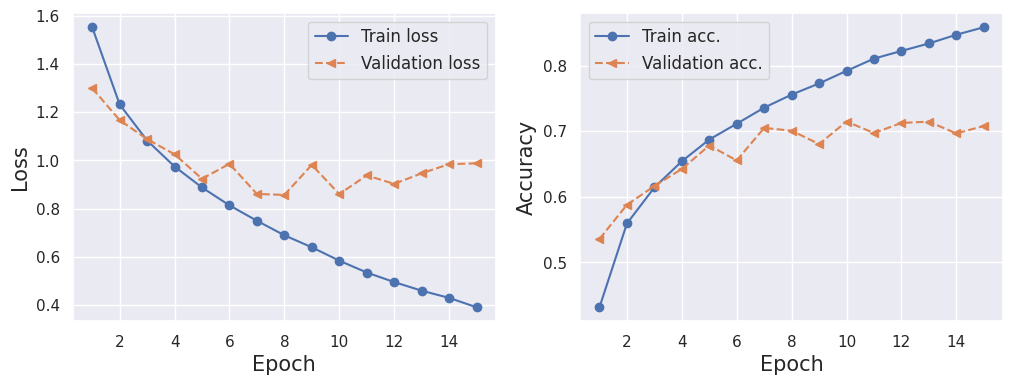

In [16]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [17]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 1.0038 - accuracy: 0.7090

Test Acc. 70.90%


In [18]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(x_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 1s 2ms/step
[3 8 8 ... 5 1 7]


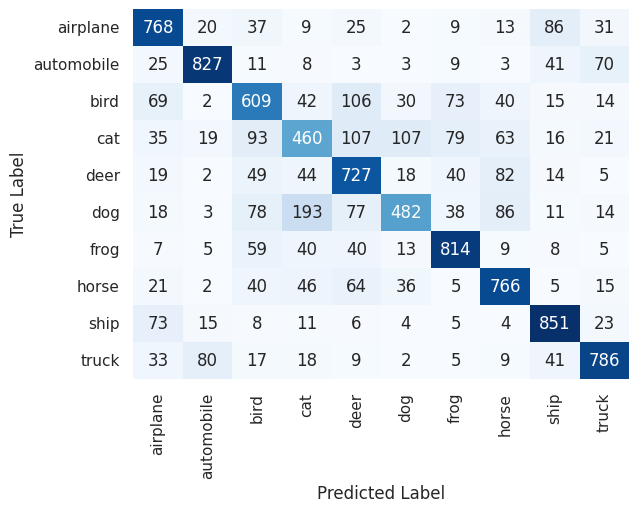

In [19]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

### Visualize CNN Model 1 Layers and Plot Structure

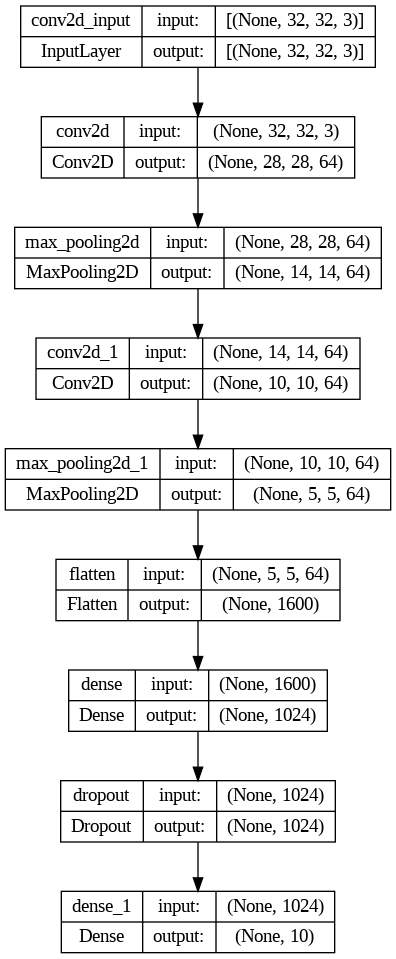

In [20]:
plot_model(model, show_shapes=True, show_layer_names=True)

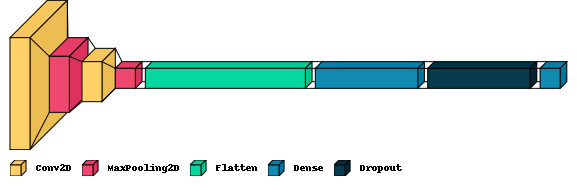

In [21]:
visualkeras.layered_view(model, legend=True)

## Build Deeper CNN Model - CNN Model 2

Differences in CNN Model 2
1.   Add a smaller Conv2D layer so that there are two before our MaxPool layers
2.   Add Dropout layers immediately after both MaxPool2D layers
3.   Double our fully-connected Dense layers

In [22]:
def build_cnn_model_2(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()
  #double-up on convolutions and add dropouts for each layer
  model.add(keras.layers.Conv2D(filters = 32, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))  
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Conv2D(filters = 32, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [23]:
model = build_cnn_model_2(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024, 1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=15, 
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/15
704/704 [==============================] - 8s 7ms/step - loss: 1.7183 - accuracy: 0.3620 - val_loss: 1.4189 - val_accuracy: 0.4754
Epoch 2/15
704/704 [==============================] - 4s 6ms/step - loss: 1.3725 - accuracy: 0.5006 - val_loss: 1.2690 - val_accuracy: 0.5418
Epoch 3/15
704/704 [==============================] - 5s 6ms/step - loss: 1.2101 - accuracy: 0.5689 - val_loss: 1.1088 - val_accuracy: 0.5980
Epoch 4/15
704/704 [==============================] - 4s 6ms/step - loss: 1.0926 - accuracy: 0.6148 - val_loss: 1.0340 - val_accuracy: 0.6302
Epoch 5/15
704/704 [==============================] - 5s 7ms/step - loss: 0.9931 - accuracy: 0.6490 - val_loss: 0.9165 - val_accuracy: 0.6704
Epoch 6/15
704/704 [==============================] - 4s 6ms/step - loss: 0.9192 - accuracy: 0.6757 - val_loss: 0.8719 - val_accuracy: 0.6952
Epoch 7/15
704/704 [==============================] - 5s 8ms/step - loss: 0.8606 - accuracy: 0.6981 - val_loss: 0.8515 - val_accuracy: 0.7096
Epoch 

,loss,accuracy,val_loss,val_accuracy
0,1.718346,0.362022,1.418940,0.4754
1,1.372465,0.500622,1.268956,0.5418
2,1.210084,0.568867,1.108767,0.5980
3,1.092561,0.614800,1.033993,0.6302
4,0.993131,0.648978,0.916479,0.6704
5,0.919245,0.675689,0.871932,0.6952
6,0.860583,0.698111,0.851455,0.7096
7,0.818951,0.711133,0.861205,0.6992
8,0.781492,0.725867,0.772522,0.7386
9,0.735588,0.739356,0.804670,0.7318


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        51232     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        51264     
                                                        

### Plot CNN Model 2 Training & Validation Accuracy, Evaluate Model Against Test Data

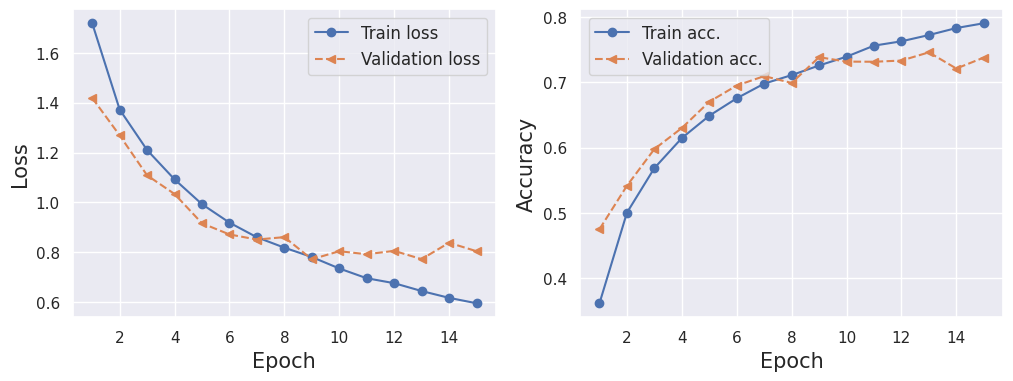

In [24]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [25]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.8260 - accuracy: 0.7354

Test Acc. 73.54%


In [26]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(x_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 1s 3ms/step
[3 8 8 ... 5 1 7]


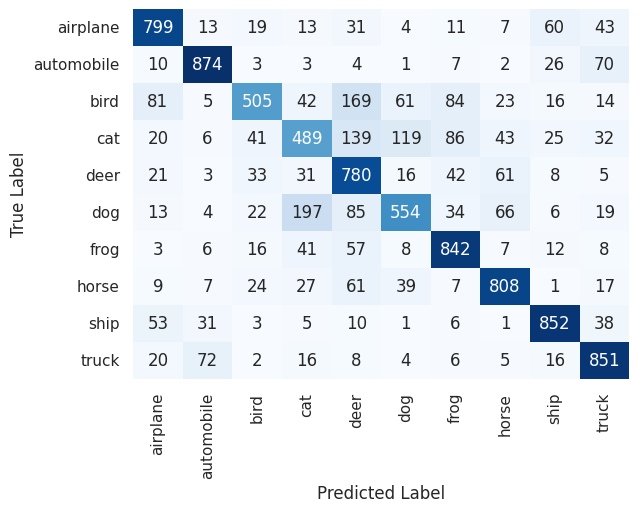

In [27]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

### Visualize CNN Model 2 Layers and Plot Structure

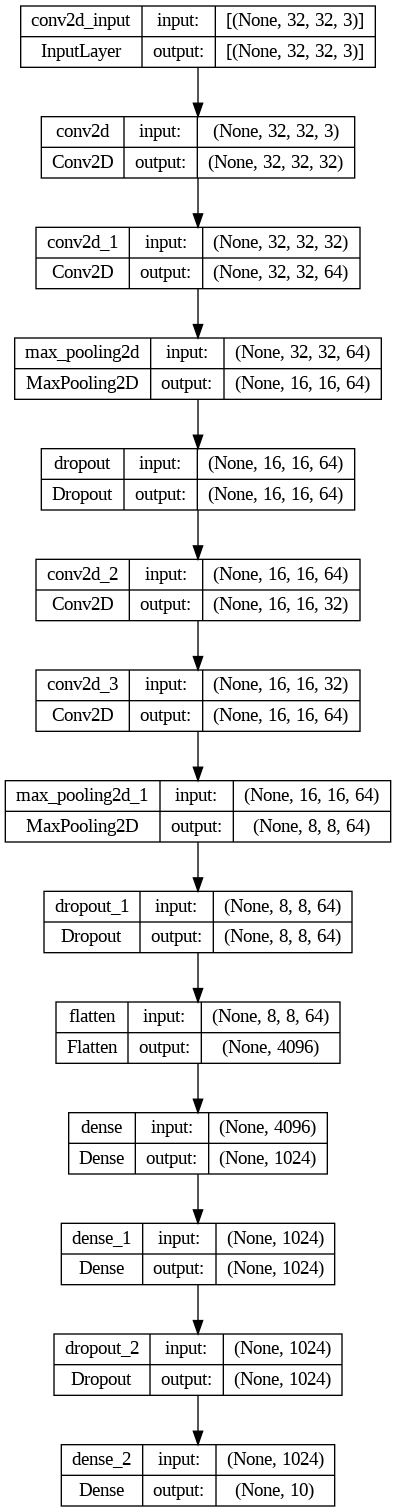

In [28]:
plot_model(model, show_shapes=True, show_layer_names=True)

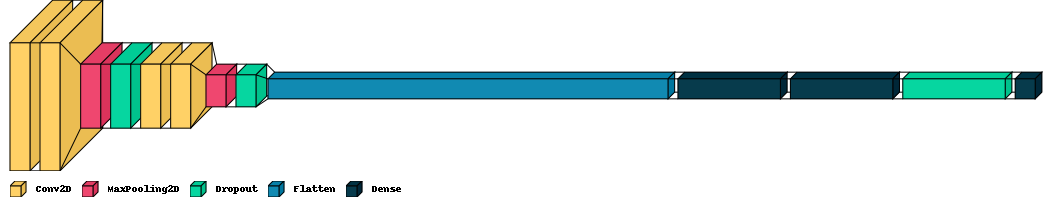

In [29]:
visualkeras.layered_view(model, legend=True)

## Build Even Deeper CNN Model - CNN Model 3 With Batch Normalization

Differences in CNN Model 3:
1. Increase density of Conv2D layers 
2. Add BatchNormalizatoin after each Conv2D layer
3. Add another Layer of Conv2D + MaxPooling + BatchNormalization
3. Increase Training Time to 20 epochs

In [19]:
def build_cnn_model_3(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()

  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())  
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.4)) # adjust dropout layer

  model.add(keras.layers.Conv2D(filters = 128, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())  
  model.add(keras.layers.Conv2D(filters = 128, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.4)) # adjust dropout layer

  model.add(keras.layers.Conv2D(filters = 256, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())  
  model.add(keras.layers.Conv2D(filters = 256, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.4)) # adjust dropout layer

  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [20]:
model = build_cnn_model_3(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024, 1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=20, #can we train a bit longer
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/20
704/704 [==============================] - 23s 9ms/step - loss: 1.6659 - accuracy: 0.4198 - val_loss: 1.2865 - val_accuracy: 0.5472
Epoch 2/20
704/704 [==============================] - 6s 8ms/step - loss: 1.1137 - accuracy: 0.6093 - val_loss: 1.4889 - val_accuracy: 0.5234
Epoch 3/20
704/704 [==============================] - 6s 8ms/step - loss: 0.8907 - accuracy: 0.6950 - val_loss: 0.8451 - val_accuracy: 0.7122
Epoch 4/20
704/704 [==============================] - 6s 8ms/step - loss: 0.7582 - accuracy: 0.7446 - val_loss: 1.1670 - val_accuracy: 0.6084
Epoch 5/20
704/704 [==============================] - 6s 8ms/step - loss: 0.6649 - accuracy: 0.7768 - val_loss: 0.8532 - val_accuracy: 0.7280
Epoch 6/20
704/704 [==============================] - 6s 9ms/step - loss: 0.5856 - accuracy: 0.8008 - val_loss: 0.8093 - val_accuracy: 0.7474
Epoch 7/20
704/704 [==============================] - 6s 8ms/step - loss: 0.5229 - accuracy: 0.8238 - val_loss: 0.6590 - val_accuracy: 0.7772
Epoch

,loss,accuracy,val_loss,val_accuracy
0,1.665926,0.419822,1.286484,0.5472
1,1.113744,0.609267,1.488923,0.5234
2,0.890680,0.695022,0.845077,0.7122
3,0.758219,0.744622,1.166980,0.6084
4,0.664863,0.776756,0.853184,0.7280
5,0.585606,0.800822,0.809256,0.7474
6,0.522938,0.823778,0.659000,0.7772
7,0.467581,0.842044,0.651002,0.8010
8,0.419610,0.859556,0.689359,0.7938
9,0.383993,0.874733,0.669987,0.8120


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

### Plot CNN Model 3 Training & Validation Accuracy, Evaluate Model Against Test Data

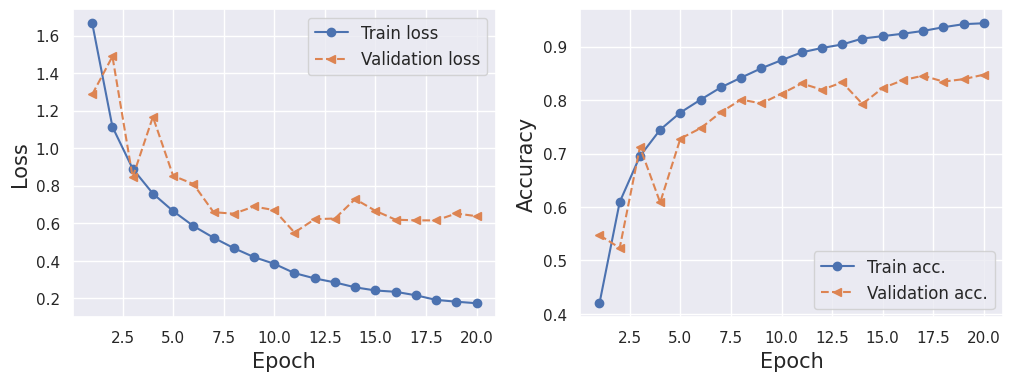

In [21]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [22]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.6221 - accuracy: 0.8411

Test Acc. 84.11%


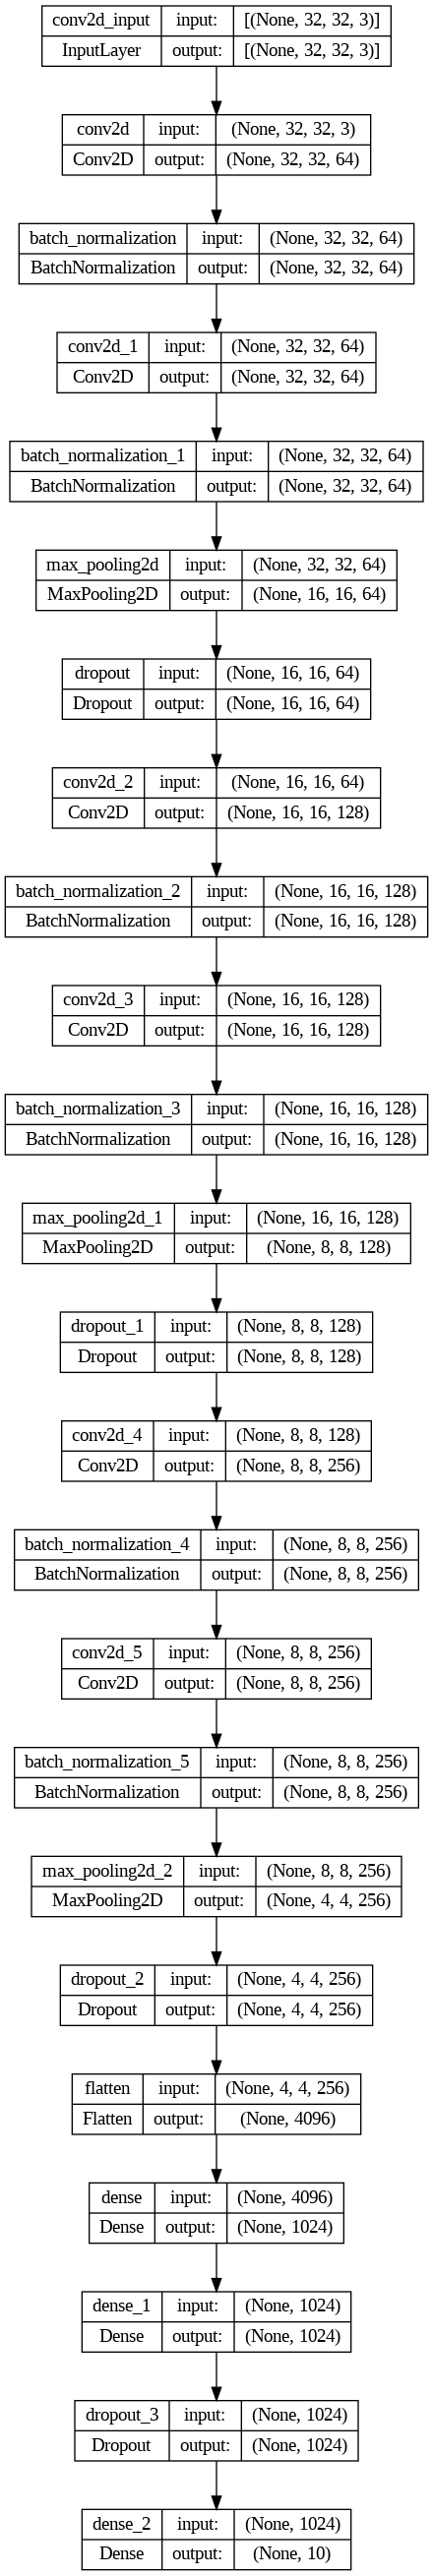

In [23]:
plot_model(model, show_shapes=True, show_layer_names=True)

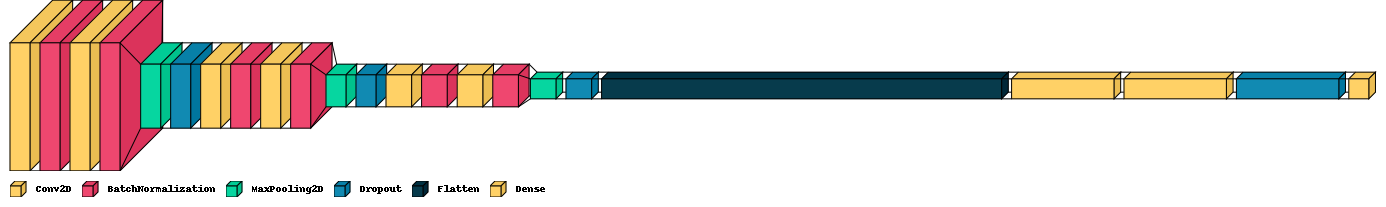

In [24]:
visualkeras.layered_view(model, legend=True)

### Evaluate CNN Model Precision and Accuracy Metrics by Label

In [25]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(x_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 1s 2ms/step
[3 8 8 ... 5 1 7]


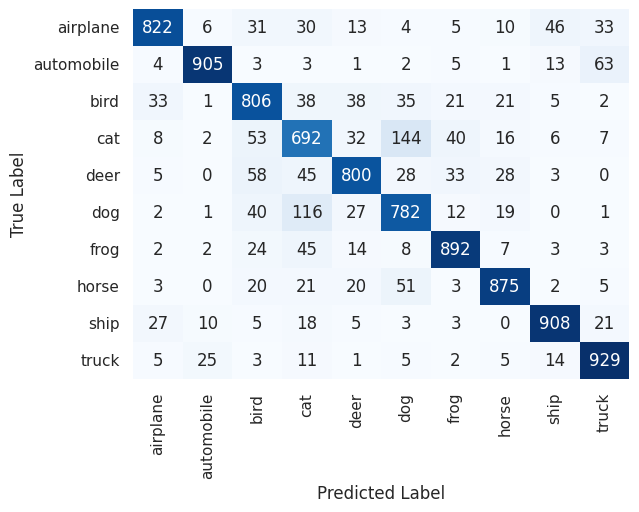

In [26]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [27]:
# Calculate Precision: TP / (TP+FP) ~ divide the true positives for each label by the sum down the columns (axis=0) 
for i in range(10):
    print(label_names[i], "\t", confusion_matrix[(i,i)]/tf.reduce_sum(confusion_matrix,0)[i])

airplane 	 tf.Tensor(0.9023051591657519, shape=(), dtype=float64)
automobile 	 tf.Tensor(0.9506302521008403, shape=(), dtype=float64)
bird 	 tf.Tensor(0.7727708533077661, shape=(), dtype=float64)
cat 	 tf.Tensor(0.6790971540726202, shape=(), dtype=float64)
deer 	 tf.Tensor(0.8412197686645636, shape=(), dtype=float64)
dog 	 tf.Tensor(0.736346516007533, shape=(), dtype=float64)
frog 	 tf.Tensor(0.8779527559055118, shape=(), dtype=float64)
horse 	 tf.Tensor(0.8910386965376782, shape=(), dtype=float64)
ship 	 tf.Tensor(0.908, shape=(), dtype=float64)
truck 	 tf.Tensor(0.8731203007518797, shape=(), dtype=float64)


label names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 



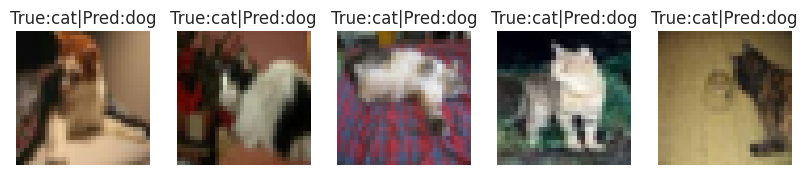

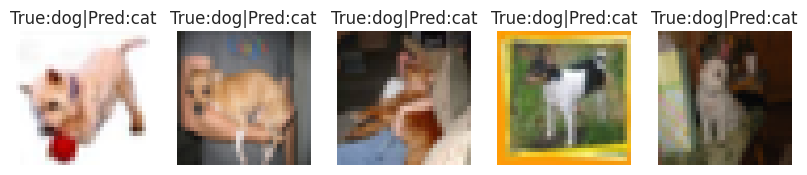

In [28]:
print("label names:", label_names,"\n")
x_test_1 = x_test[np.logical_and(y_test==3, test_predictions==5)] #true label = 'cat', predicted label = 'dog'
x_test_2 = x_test[np.logical_and(y_test==5, test_predictions==3)] #true label = 'cat', predicted label = 'frog'

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
for i in range(5):
  axs[i].imshow(x_test_1[i], cmap='gray')
  axs[i].set_title("True:" + label_names[3] + "|Pred:" + label_names[5])
  axs[i].axis('off')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
for i in range(5):
  axs[i].imshow(x_test_2[i], cmap='gray')
  axs[i].set_title("True:" + label_names[5] + "|Pred:" + label_names[3])
  axs[i].axis('off')
plt.show()

## NOT RUNNING BELOW: Incorporate Pre-Processing Data and Run on Our Best Model

170498071/170498071 [==============================] - 4s 0us/step
x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


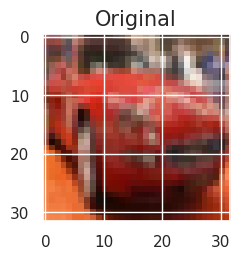

In [4]:
# # load training and testing datasets
# (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()  # or cifar100.load_data()

# print("x_train shape: ", X_train.shape)
# print("y_train shape: ", Y_train.shape)
# print("x_test shape: ", X_test.shape)
# print("y_test shape: ", Y_test.shape)

# # covert to RGB
# X_train = X_train/255.0
# X_test = X_test/255.0

# # plot original
# fig = plt.figure(figsize=(14, 12))
# ax = fig.add_subplot(1, 5, 1)
# ax.imshow(X_train[5])
# ax.set_title('Original', size=15);

# plt.show()

### Resize 32x32 Images to 64x64

x_train shape:  (50000, 64, 64, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 64, 64, 3)
y_test shape:  (10000, 1)


TypeError: ignored

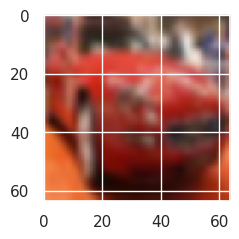

In [11]:
# IMAGE_SIZE = (64,64)
# X_train = tf.image.resize(X_train, size=IMAGE_SIZE)
# X_test = tf.image.resize(X_test, size=IMAGE_SIZE)
# print("x_train shape: ", X_train.shape)
# print("y_train shape: ", Y_train.shape)
# print("x_test shape: ", X_test.shape)
# print("y_test shape: ", Y_test.shape)

# #image = X_train[5]

# # plot resized image
# fig = plt.figure(figsize=(14, 12))
# ax = fig.add_subplot(1, 5, 1)
# ax.imshow(ax.imshow(X_train[5]))
# ax.set_title('Resized to 64 x 64', size=15);
# plt.show()


### Add CONTRAST & BRIGHTNESS & RANDOM IMAGE FLIP to images

In [48]:
# # COMMENTED OUT CODE BLOCK TO RUN OUR MODELS
# CONTRAST_FACTOR = 2
# DELTA = 0.3
# # adjust brightness
# x_train_augm = tf.image.adjust_brightness(X_train, delta=DELTA)

# # adjust contrast
# x_train_augm = tf.image.adjust_contrast(x_train_augm, contrast_factor=CONTRAST_FACTOR)

# #add random flip
# x_train_augm = tf.image.random_flip_left_right(x_train_augm)

# # plot adjusted image
# fig = plt.figure(figsize=(14, 12))
# ax = fig.add_subplot(1, 5, 1)
# ax.imshow(ax.imshow(x_train_augm[5]))
# ax.set_title('Adjust Brightness & Color', size=15);
# plt.show()

ResourceExhaustedError: ignored

### Concatenate Original Training data with Augmented Training Data & Shuffle

In [ ]:
#  # concatenate original X_train and augmented X_train data
# X_train = tf.concat([X_train, x_train_augm],axis=0)

# # concatenate y_train (note the label is preserved)
# Y_train_augm = y_train
# Y_train = tf.concat([y_train, y_train_augm],axis=0)

In [49]:
# # shuffle X_train and y_train, i.e., shuffle two tensors in the same order
# shuffle = tf.random.shuffle(tf.range(tf.shape(X_train)[0], dtype=tf.int32))
# X_train = tf.gather(X_train, shuffle)
# Y_train = tf.gather(Y_train, shuffle).numpy() #also transforms y_train to numpy array

# ###NOTE: FINAL TRAINING DATA SET IS STORED IN VARIABLE X_train

# print("X_train shape: ", X_train.shape)
# print("Y_train shape: ", Y_train.shape)

ResourceExhaustedError: ignored

### Run CNN Model 3 on Augmented Training Set

In [1]:
# model = build_cnn_model_3(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024, 1024])

# history = model.fit(
#   x = X_train,
#   y = Y_train,
#   epochs=20, #can we train a bit longer
#   batch_size=64,
#   validation_split=0.1,
#   verbose=1)

# display(pd.DataFrame(history.history))
# print(model.summary())

## Explore Transfer Learning

### Build ResNet50 And Train Model

In [51]:
#load ResNet50 Pre-Trained Model
from tensorflow.keras.applications.resnet50 import ResNet50

# load training and testing datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # or cifar100.load_data()

In [52]:
def preprocess_image_input(input):
  input = input.astype('float32')
  output = tf.keras.applications.resnet50.preprocess_input(input)
  return output

In [53]:
X_train = preprocess_image_input(x_train)
X_test = preprocess_image_input(x_test)

print(f"X_train shape {X_train.shape}")
print(f"X_test shape {X_test.shape}")

X_train shape (50000, 32, 32, 3)
X_test shape (10000, 32, 32, 3)


In [54]:
'''
Feature Extraction is performed by ResNet50 pretrained on imagenet weights. 
Input size is 224 x 224.
'''
def feature_extractor(inputs):

  feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')(inputs)
  return feature_extractor


'''
Defines final dense layers and subsequent softmax layer for classification.
'''
def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    #x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x

'''
Since input image size is (32 x 32), first upsample the image by factor of (7x7) to transform it to (224 x 224)
Connect the feature extraction and "classifier" layers to build the model.
'''
def final_model(inputs):

    resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)

    resnet_feature_extractor = feature_extractor(resize)
    classification_output = classifier(resnet_feature_extractor)

    return classification_output

'''
Define the model and compile it. 
Use Adam as the optimizer.
Use Sparse Categorical CrossEntropy as the loss function.
'''
def define_compile_model():
  inputs = tf.keras.layers.Input(shape=(32,32,3))
  
  classification_output = final_model(inputs) 
  model = tf.keras.Model(inputs=inputs, outputs = classification_output)
 
  model.compile(optimizer='Adam', 
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model


model = define_compile_model()

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d_3 (UpSampling  (None, 224, 224, 3)      0         
 2D)                                                             
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              2098

In [55]:
history = model.fit(
  x = X_train, 
  y = y_train,
  epochs=10, 
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/10
704/704 [==============================] - 104s 99ms/step - loss: 0.7713 - accuracy: 0.7374 - val_loss: 1.2996 - val_accuracy: 0.6372
Epoch 2/10
704/704 [==============================] - 69s 97ms/step - loss: 0.4211 - accuracy: 0.8572 - val_loss: 0.9375 - val_accuracy: 0.7090
Epoch 3/10
704/704 [==============================] - 68s 97ms/step - loss: 0.3008 - accuracy: 0.8950 - val_loss: 0.6213 - val_accuracy: 0.8094
Epoch 4/10
704/704 [==============================] - 69s 97ms/step - loss: 0.2269 - accuracy: 0.9204 - val_loss: 0.3836 - val_accuracy: 0.8766
Epoch 5/10
704/704 [==============================] - 69s 98ms/step - loss: 0.1722 - accuracy: 0.9392 - val_loss: 0.5024 - val_accuracy: 0.8442
Epoch 6/10
704/704 [==============================] - 69s 97ms/step - loss: 0.1304 - accuracy: 0.9546 - val_loss: 0.5267 - val_accuracy: 0.8536
Epoch 7/10
704/704 [==============================] - 68s 97ms/step - loss: 0.1087 - accuracy: 0.9628 - val_loss: 0.6911 - val_accuracy

,loss,accuracy,val_loss,val_accuracy
0,0.771273,0.737356,1.299573,0.6372
1,0.421061,0.857200,0.937489,0.7090
2,0.300811,0.895022,0.621339,0.8094
3,0.226888,0.920422,0.383586,0.8766
4,0.172220,0.939222,0.502410,0.8442
5,0.130424,0.954644,0.526664,0.8536
6,0.108700,0.962844,0.691096,0.8084
7,0.102870,0.964422,0.555585,0.8702
8,0.079793,0.972911,0.493570,0.8648
9,0.060454,0.978644,0.455895,0.8848


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d_3 (UpSampling  (None, 224, 224, 3)      0         
 2D)                                                             
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              2098

### Plot ResNet50 Training & Validation Accuracy, Evaluate Model Against Test Data

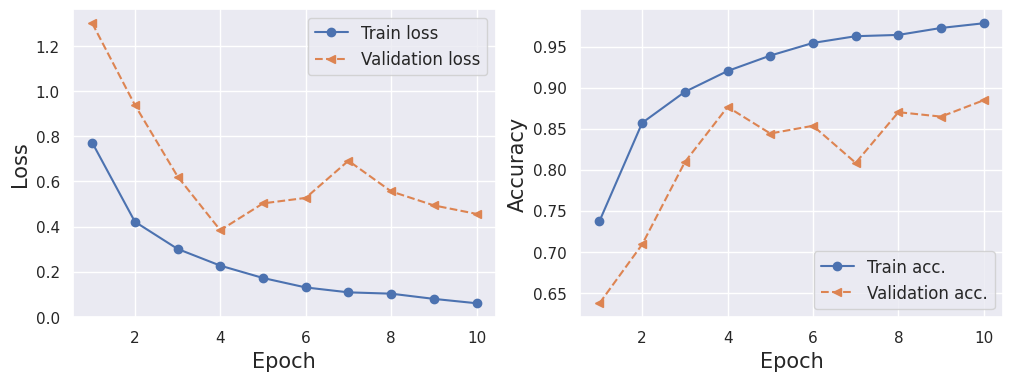

In [56]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [57]:
test_results = model.evaluate(X_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 5s 14ms/step - loss: 0.4553 - accuracy: 0.8844

Test Acc. 88.44%


### Evaluate ResNet50 Model Precision and Accuracy Metrics by Label

In [61]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(X_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 5s 12ms/step
[3 8 8 ... 5 1 7]


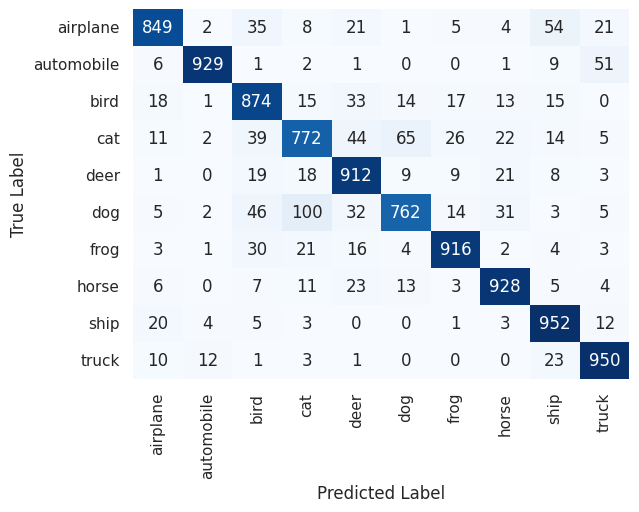

In [62]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [63]:
# Calculate Precision: TP / (TP+FP) ~ divide the true positives for each label by the sum down the columns (axis=0) 
for i in range(10):
    print(label_names[i], "\t", confusion_matrix[(i,i)]/tf.reduce_sum(confusion_matrix,0)[i])

airplane 	 tf.Tensor(0.9138858988159311, shape=(), dtype=float64)
automobile 	 tf.Tensor(0.974816369359916, shape=(), dtype=float64)
bird 	 tf.Tensor(0.826868495742668, shape=(), dtype=float64)
cat 	 tf.Tensor(0.8100734522560336, shape=(), dtype=float64)
deer 	 tf.Tensor(0.8421052631578947, shape=(), dtype=float64)
dog 	 tf.Tensor(0.8778801843317973, shape=(), dtype=float64)
frog 	 tf.Tensor(0.9243188698284561, shape=(), dtype=float64)
horse 	 tf.Tensor(0.9053658536585366, shape=(), dtype=float64)
ship 	 tf.Tensor(0.8758049678012879, shape=(), dtype=float64)
truck 	 tf.Tensor(0.9013282732447818, shape=(), dtype=float64)


### Build VGG16 and Train Model

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.utils.np_utils import to_categorical

In [4]:
# Initialize our vgg16 pre-trained model with imagenet weights
vgg16_model = VGG16(weights='imagenet',
                    include_top=False, 
                    classes=10,
                    input_shape=(32,32,3)# input: 32x32 images with 3 channels -> (32, 32, 3) tensors.
                   )

#Define the sequential model and add th VGG's layers to it
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

# Adding hidden and output layer to our model

from tensorflow.keras.layers import Dense, Flatten, Dropout
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                         

In [15]:
# load training and testing datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # or cifar100.load_data()

# Convert class vectors to binary class matrices using one hot encoding
y_train_ohe = to_categorical(y_train, num_classes = 10)
y_test_ohe = to_categorical(y_test, num_classes = 10)

# Data normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

print(x_train.shape)
print(y_train_ohe.shape)
print(x_test.shape)
print(y_test_ohe.shape)

# Build validation datasets
x_val = x_train[40000:]
y_val = y_train_ohe[40000:]
print(f"x_val shape {x_val.shape}")
print(f"y_val shape {y_val.shape}")

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)
x_val shape (10000, 32, 32, 3)
y_val shape (10000, 10)


In [6]:
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import LearningRateScheduler

#------------------------------------------------------------------------------
# TRAINING THE CNN ON THE TRAIN/VALIDATION DATA
#------------------------------------------------------------------------------

# initiate SGD optimizer
sgd = optimizers.SGD(learning_rate=0.001, momentum=0.9)

# For a multi-class classification problem
model.compile(loss='categorical_crossentropy',optimizer= sgd,metrics=['accuracy'])

def lr_scheduler(epoch):
    return 0.001 * (0.5 ** (epoch // 20))
reduce_lr = LearningRateScheduler(lr_scheduler)

#mc = ModelCheckpoint('./weights.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# initialize the number of epochs and batch size
EPOCHS = 20
BS = 128

# construct the training image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=20, 
    zoom_range=0.15, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.15,
    horizontal_flip=True, 
    fill_mode="nearest")
 
# train the model
history = model.fit(
    aug.flow(x_train,y_train_ohe, batch_size=BS),
    validation_data=(x_val,y_val),
    #steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS#,
    #callbacks=reduce_lr
    )

#We load the best weights saved by the ModelCheckpoint
#model.load_weights('./weights.h5')

#show output of model
display(pd.DataFrame(history.history))
print(model.summary())


Epoch 1/20
391/391 [==============================] - 41s 75ms/step - loss: 1.4264 - accuracy: 0.4876 - val_loss: 0.8662 - val_accuracy: 0.6937
Epoch 2/20
391/391 [==============================] - 27s 69ms/step - loss: 0.9466 - accuracy: 0.6711 - val_loss: 0.7192 - val_accuracy: 0.7482
Epoch 3/20
391/391 [==============================] - 27s 69ms/step - loss: 0.8176 - accuracy: 0.7155 - val_loss: 0.6269 - val_accuracy: 0.7776
Epoch 4/20
391/391 [==============================] - 27s 70ms/step - loss: 0.7436 - accuracy: 0.7428 - val_loss: 0.5369 - val_accuracy: 0.8144
Epoch 5/20
391/391 [==============================] - 27s 69ms/step - loss: 0.6874 - accuracy: 0.7620 - val_loss: 0.5110 - val_accuracy: 0.8189
Epoch 6/20
391/391 [==============================] - 27s 69ms/step - loss: 0.6472 - accuracy: 0.7756 - val_loss: 0.4948 - val_accuracy: 0.8293
Epoch 7/20
391/391 [==============================] - 27s 69ms/step - loss: 0.6091 - accuracy: 0.7905 - val_loss: 0.4316 - val_accuracy:

,loss,accuracy,val_loss,val_accuracy
0,1.426402,0.48764,0.866216,0.6937
1,0.946568,0.67110,0.719181,0.7482
2,0.817560,0.71554,0.626926,0.7776
3,0.743608,0.74280,0.536914,0.8144
4,0.687373,0.76200,0.511011,0.8189
5,0.647178,0.77558,0.494814,0.8293
6,0.609072,0.79048,0.431603,0.8490
7,0.578027,0.80014,0.442384,0.8462
8,0.556775,0.80556,0.417469,0.8542
9,0.535339,0.81610,0.467015,0.8415


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)         2

### Plot VGG16 Training & Validation Accuracy, Evaluate VGG16 vs Test Data

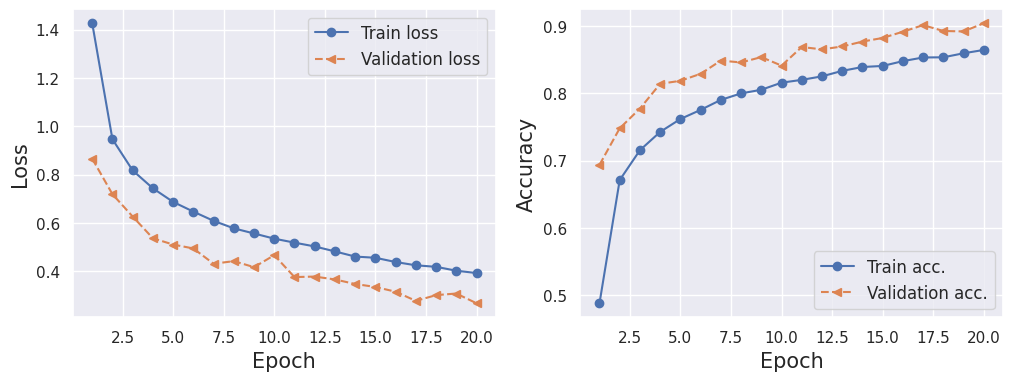

In [16]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [17]:
test_results = model.evaluate(x_test, y_test_ohe)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.4079 - accuracy: 0.8618

Test Acc. 86.18%


### Evaluate VGG16 Model Precision & Accuracy by Label

In [18]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(x_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 1s 3ms/step
[3 8 8 ... 5 1 7]


In [12]:
print(test_predictions.shape)

(10000,)


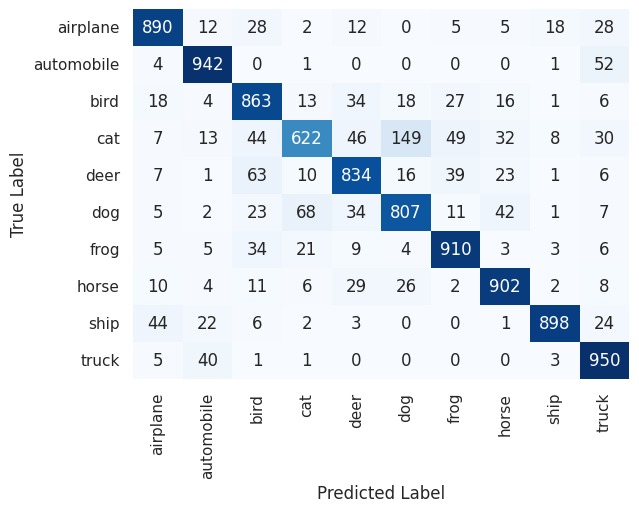

In [19]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [20]:
# Calculate Precision: TP / (TP+FP) ~ divide the true positives for each label by the sum down the columns (axis=0) 
for i in range(10):
    print(label_names[i], "\t", confusion_matrix[(i,i)]/tf.reduce_sum(confusion_matrix,0)[i])

airplane 	 tf.Tensor(0.8944723618090452, shape=(), dtype=float64)
automobile 	 tf.Tensor(0.9014354066985646, shape=(), dtype=float64)
bird 	 tf.Tensor(0.804287045666356, shape=(), dtype=float64)
cat 	 tf.Tensor(0.8337801608579088, shape=(), dtype=float64)
deer 	 tf.Tensor(0.8331668331668332, shape=(), dtype=float64)
dog 	 tf.Tensor(0.7911764705882353, shape=(), dtype=float64)
frog 	 tf.Tensor(0.87248322147651, shape=(), dtype=float64)
horse 	 tf.Tensor(0.880859375, shape=(), dtype=float64)
ship 	 tf.Tensor(0.9594017094017094, shape=(), dtype=float64)
truck 	 tf.Tensor(0.8504923903312444, shape=(), dtype=float64)
